## Boston House Price Predictor

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("boston_data.csv")

In [3]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287425,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705373,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# housing.hist(bins=70, figsize=(20, 15))

## Train-Test Splitting

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=41)
print("Rows in train set: {}\nRows in test set: {}".format(len(train_set), len(test_set)))

Rows in train set: 404
Rows in test set: 102


In [7]:
# Supposing 'CHAS' is an important parameter then we need to make sure that 
# the train and test data splitting contain this data in equal shares
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_ind, test_ind in strat_split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_ind]
    strat_test_set = housing.loc[test_ind]
print("Rows in train set: {}\nRows in test set: {}".format(len(strat_train_set), len(strat_test_set)))

Rows in train set: 404
Rows in test set: 102


## Looking for Correlations

In [8]:
corr_matrix = strat_train_set.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.711254
B          0.359097
ZN         0.351710
DIS        0.232768
CHAS       0.133617
AGE       -0.355094
CRIM      -0.384319
RAD       -0.392440
NOX       -0.417163
TAX       -0.466976
INDUS     -0.472572
PTRATIO   -0.539773
LSTAT     -0.742988
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

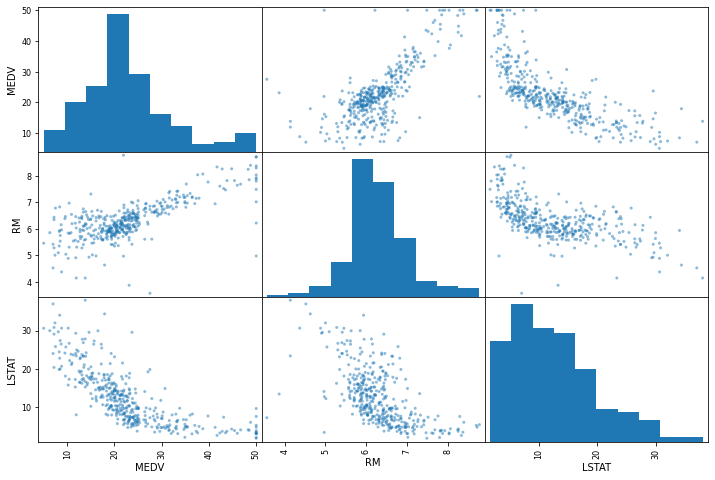

In [9]:
from pandas.plotting import scatter_matrix
attr = ['MEDV', 'RM', 'LSTAT']
scatter_matrix(strat_train_set[attr], figsize=(12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

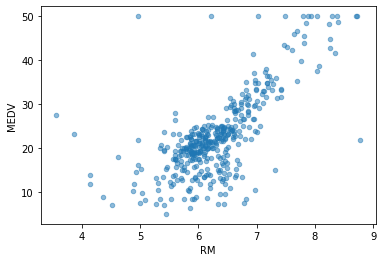

In [10]:
strat_train_set.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

## Missing Attributes

To take care of missing attributes, there are three options:
    1. Get rid of the missing data points
    2. Get rid of whole attribute
    3. Set the value to some value (0, mean or median)

In [11]:
# 'RM' column has some missing values, using option 3 using sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(strat_train_set)

SimpleImputer(strategy='median')

In [12]:
X = imputer.transform(strat_train_set)
housing_tr = pd.DataFrame(X, columns=housing.columns)

## Scikit-learn Design

Primarily, 3 types of objects
1. Estimators
2. Tranformers
3. Predictors

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-Max scaling (Normalization)
    (value - min)/( max - min) -> sklearn provides a class called MinMaxScaler for this
2. Standardization
    (value - mean)/std_dev -> sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # add as many as you want
    ('std_scaler', StandardScaler())
])

In [14]:
housing_label = strat_train_set['MEDV'].copy()
strat_train_set = strat_train_set.drop('MEDV', axis = 1)

In [15]:
housing_num_tr = my_pipeline.fit_transform(strat_train_set)

## Selecting a desired model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

## Evaluating the model

In [17]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_prediction)
rmse = np.sqrt(mse)

In [18]:
rmse

1.426805170669598

## Using better evaluation technique - Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [20]:
rmse_scores

array([2.89044657, 3.73012599, 4.24577115, 3.73420851, 2.27244584,
       3.58816865, 2.32671319, 2.45866091, 6.36819216, 4.46610724])

In [21]:
def print_score_attr(rmse):
    print('Mean: {}\nStandard Deviation: {}'.format(rmse.mean(), rmse.std()))

In [22]:
print_score_attr(rmse_scores)

Mean: 3.608084020634761
Standard Deviation: 1.1855067048204513


## Saving the model

In [23]:
from joblib import dump, load
dump(model, 'Boston_Housing.joblib')

['Boston_Housing.joblib']

## Testing the model

In [25]:
x_test = strat_test_set.drop('MEDV', axis = 1)
y_test = strat_test_set['MEDV'].copy()
x_test_prep = my_pipeline.transform(x_test)
final_pred = model.predict(x_test_prep)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)

In [26]:
final_rmse

3.4813770193675326

## Using the Model

In [ ]:
model_1 = load('Boston_Housing.joblib')
# features = 2D numpy array for all 13 features
# model.predict(features)